In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("dataset/crop_yield.csv")
data = data.sample(frac=0.2, random_state=1)
import seaborn as sns
import matplotlib.pyplot as plt




In [28]:
data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
276826,West,Loam,Soybean,580.119883,20.914138,True,False,Rainy,74,5.522041
849425,East,Loam,Rice,213.558303,27.679976,True,True,Sunny,79,4.469901
504499,East,Peaty,Rice,588.642204,21.920407,True,True,Sunny,69,6.341938
601054,West,Peaty,Maize,760.369825,28.039795,True,False,Sunny,111,6.815897
980221,South,Clay,Cotton,457.698017,29.259726,True,False,Cloudy,70,4.109808


In [29]:
data.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,549.711073,27.513237,104.437990,4.647432
std,259.537894,7.221205,25.948934,1.696040
min,100.006194,15.000034,60.000000,-0.731541
25%,324.863406,21.266927,82.000000,3.415261
50%,549.079133,27.528811,104.000000,4.645560
75%,774.390286,33.762242,127.000000,5.876133
max,999.995204,39.999997,149.000000,9.826285


In [30]:
# data.shape
data.info()
# data.dtypes
# data.count()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 276826 to 32132
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  200000 non-null  object 
 1   Soil_Type               200000 non-null  object 
 2   Crop                    200000 non-null  object 
 3   Rainfall_mm             200000 non-null  float64
 4   Temperature_Celsius     200000 non-null  float64
 5   Fertilizer_Used         200000 non-null  bool   
 6   Irrigation_Used         200000 non-null  bool   
 7   Weather_Condition       200000 non-null  object 
 8   Days_to_Harvest         200000 non-null  int64  
 9   Yield_tons_per_hectare  200000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 14.1+ MB


In [31]:
data.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [32]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [33]:
# Adding new column 'Value' where Value = Yield_tons_per_hectare * 1000
data['Value'] = data['Yield_tons_per_hectare'] * 1000

In [34]:
data.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare', 'Value'],
      dtype='object')

array([[<Axes: title={'center': 'Rainfall_mm'}>,
        <Axes: title={'center': 'Temperature_Celsius'}>],
       [<Axes: title={'center': 'Days_to_Harvest'}>,
        <Axes: title={'center': 'Yield_tons_per_hectare'}>],
       [<Axes: title={'center': 'Value'}>, <Axes: >]], dtype=object)

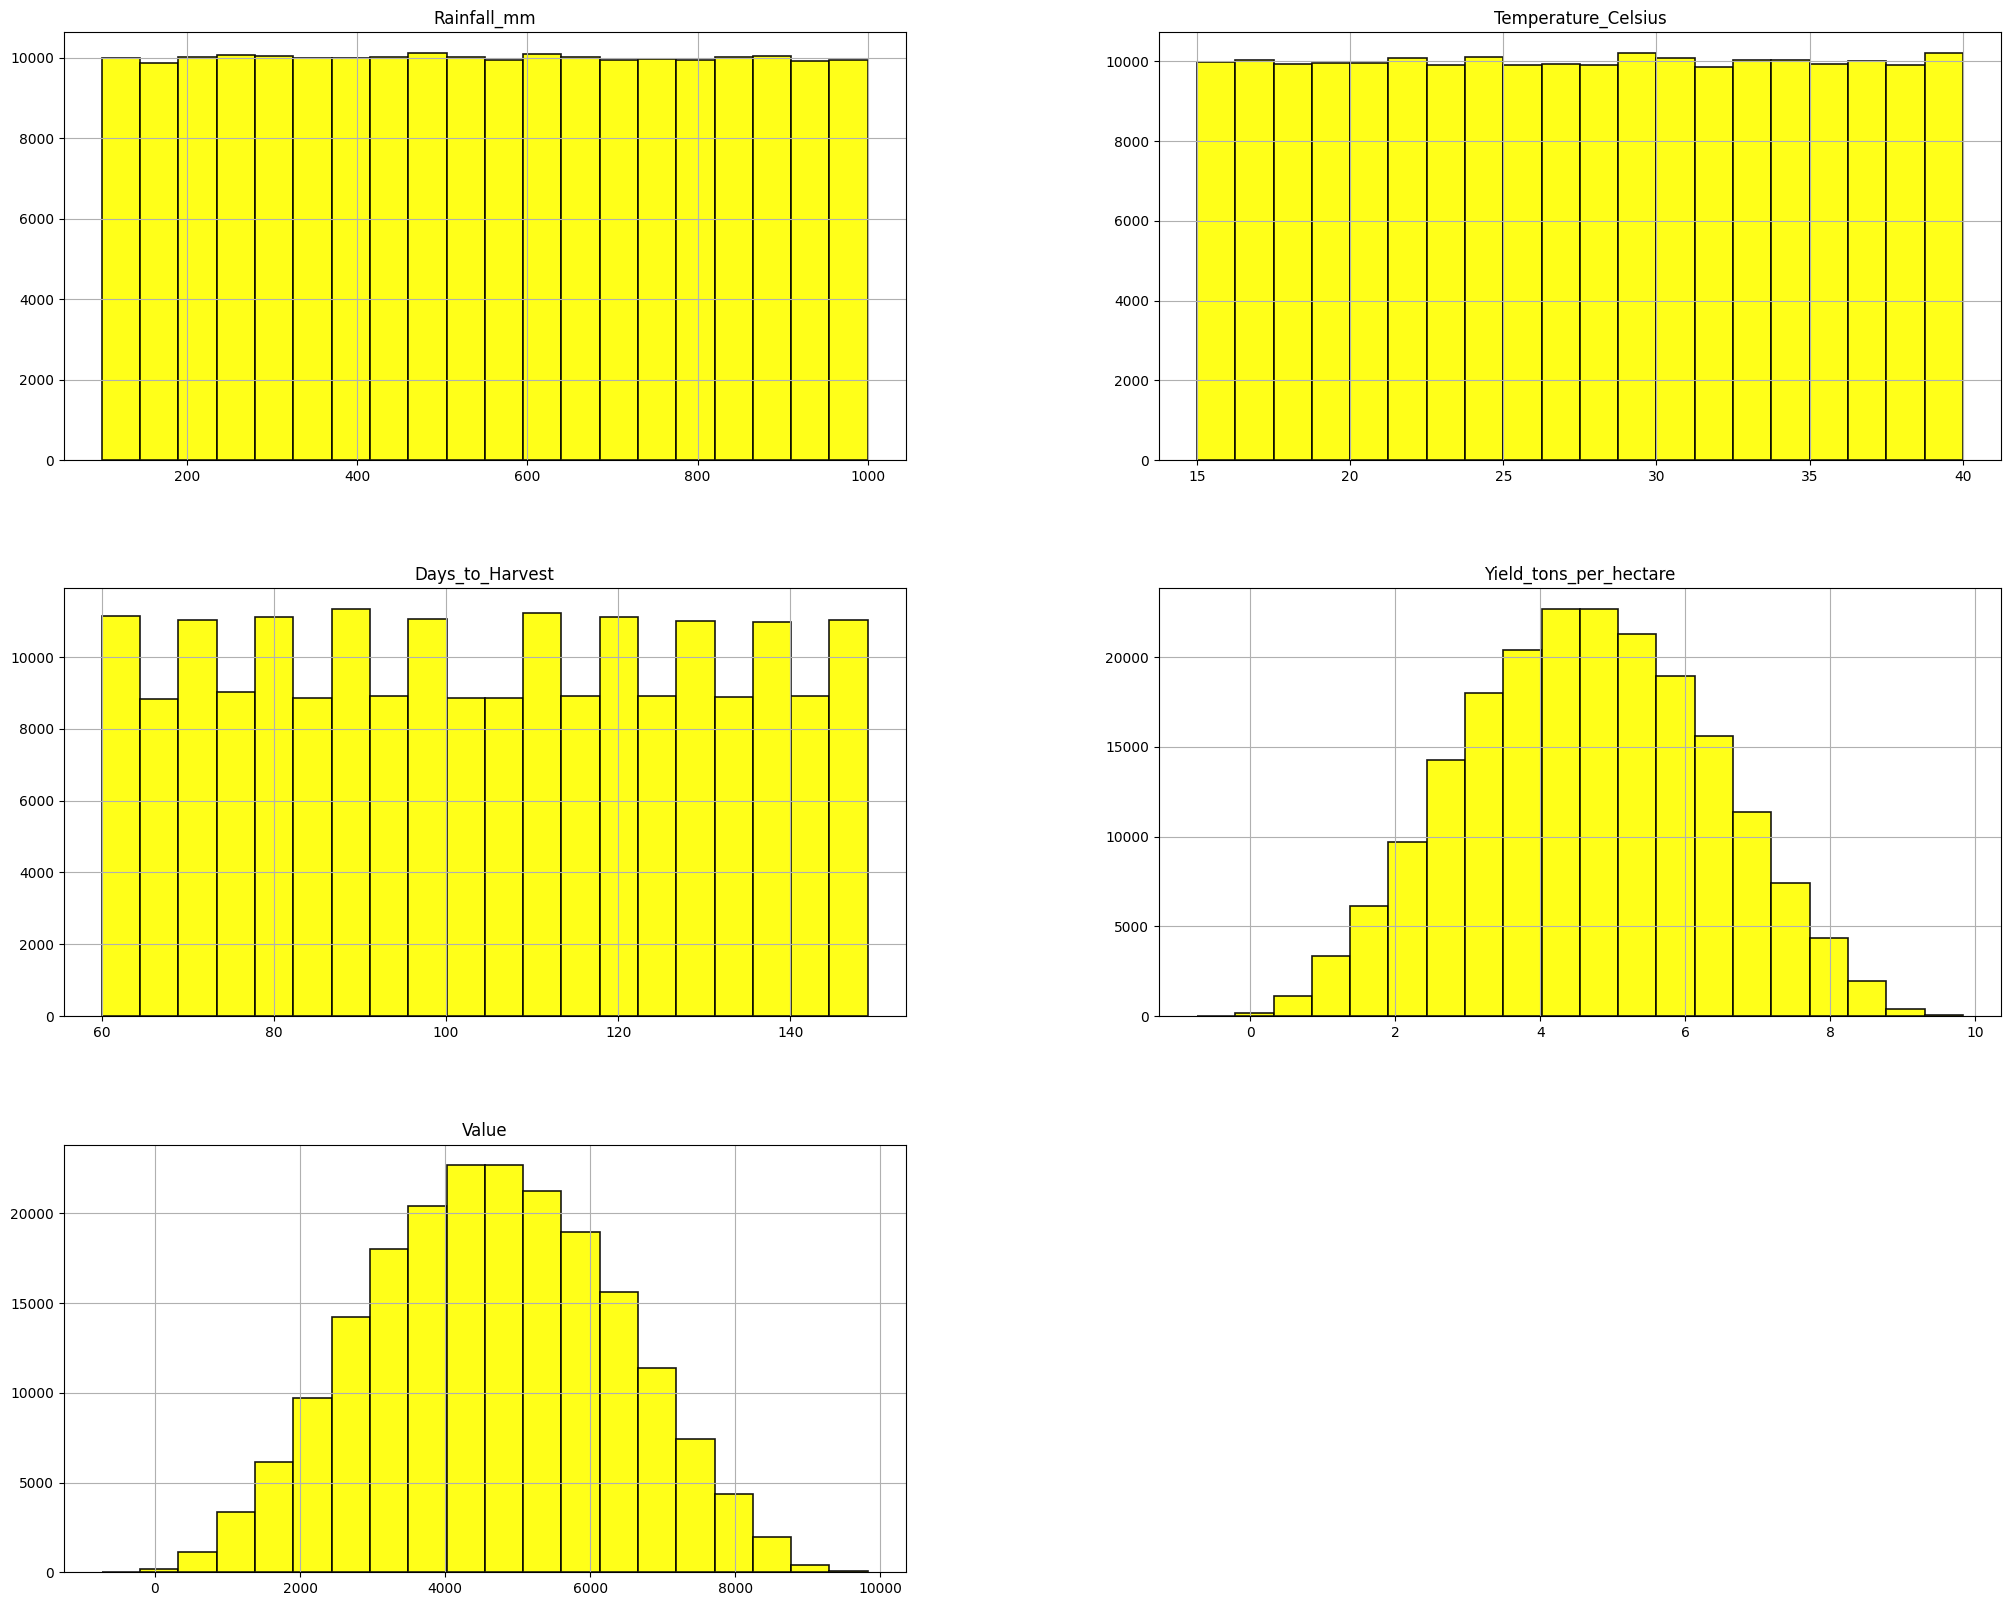

In [35]:
data.hist(bins=20, figsize=(25,20), color='yellow', alpha=0.9, edgecolor='black', linewidth=1.2)

In [36]:
df =data

1. HOW DOES SOIL TYPE AFFECT CROP YIELD?

<Axes: xlabel='Soil_Type', ylabel='Yield_tons_per_hectare'>

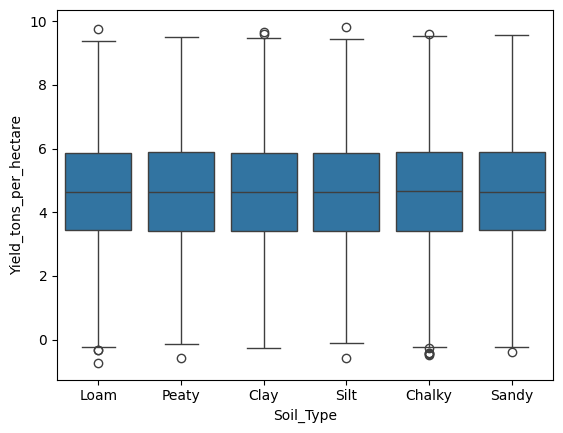

In [37]:
sns.boxplot(x = "Soil_Type", y = "Yield_tons_per_hectare", data = df)

In [38]:
model = ols(formula = "Yield_tons_per_hectare ~ C(Soil_Type)", data = df).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Yield_tons_per_hectare   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                    0.9422
Date:                    Tue, 22 Oct 2024   Prob (F-statistic):              0.452
Time:                            10:48:29   Log-Likelihood:            -3.8944e+05
No. Observations:                  200000   AIC:                         7.789e+05
Df Residuals:                      199994   BIC:                         7.790e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.6589      0.009    501.821      0.000       4.641       4.677
C(Soil_Type)[T.Clay]     -0.0206      0.013     -1.567      0.117      -0.046       0.005
C(Soil_Type)[T.Loam]     -0.0080      0.013     -0.607      0.544      -0.034       0.018
C(Soil_Type)[T.Peaty]    -0.0154      0.013     -1.170      0.242      -0.041       0.010
C(Soil_Type)[T.Sandy]    -0.0034      0.013     -0.261      0.794      -0.029       0.022
C(Soil_Type)[T.Silt]     -0.0214      0.013     -1.631      0.103      -0.047       0.004
==============================================================================
Omnibus:                     4278.432   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2254.756
Skew:                           0.006   Prob(JB):                         0.00
Kurtosis:                       2.480   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(Soil_Type),13.551860,5.0,0.942229,0.452142
Residual,575293.644745,199994.0,NaN,NaN


2. WHAT IS THE RELATIONSHIP BETWEEN RAINFALL AND CROP YIELD?
A LINEAR REGRESSION WILL BE RELEVANT TO ANSWER THIS QUESTION

In [41]:
ols_data = df[["Rainfall_mm", "Yield_tons_per_hectare"]]

In [42]:
ols_formula = "Yield_tons_per_hectare ~ Rainfall_mm"

In [43]:
OLS = ols(formula = ols_formula, data = ols_data)
df_model = OLS.fit()

In [44]:
df_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Yield_tons_per_hectare   R-squared:                       0.584
Model:                                OLS   Adj. R-squared:                  0.584
Method:                     Least Squares   F-statistic:                 2.811e+05
Date:                    Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                            10:48:29   Log-Likelihood:            -3.0167e+05
No. Observations:                  200000   AIC:                         6.033e+05
Df Residuals:                      199998   BIC:                         6.034e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9015      0.006    332.013      0.000       1.890       1.913
Rainfall_mm     0.0050   9.42e-06    530.196      0.000       0.005       0.005
==============================================================================
Omnibus:                     7700.654   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3356.061
Skew:                          -0.000   Prob(JB):                         0.00
Kurtosis:                       2.365   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

In [45]:
X = ols_data["Rainfall_mm"]

fitted_values = df_model.predict(X)

In [46]:
residuals = df_model.resid

<Axes: xlabel='Rainfall_mm', ylabel='Yield_tons_per_hectare'>

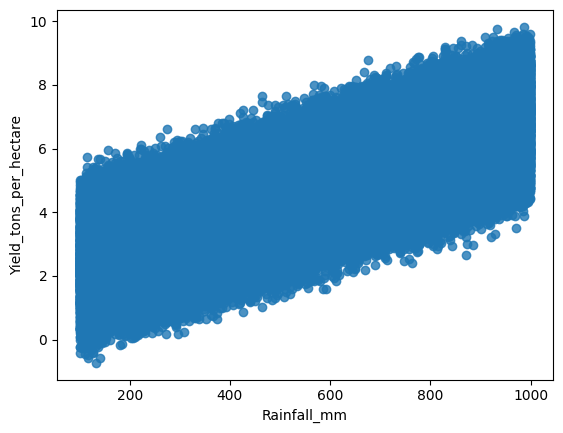

In [47]:
sns.regplot(x = "Rainfall_mm", y = "Yield_tons_per_hectare", data = ols_data)

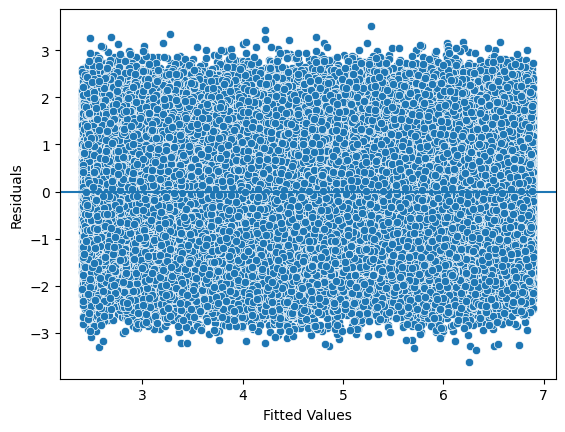

In [48]:
fig = sns.scatterplot(x = fitted_values, y = residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

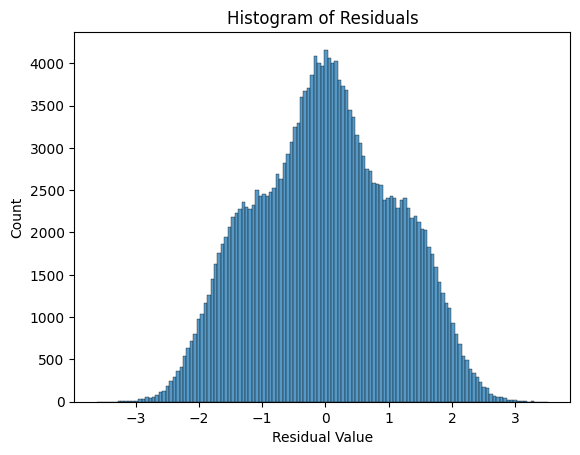

In [49]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

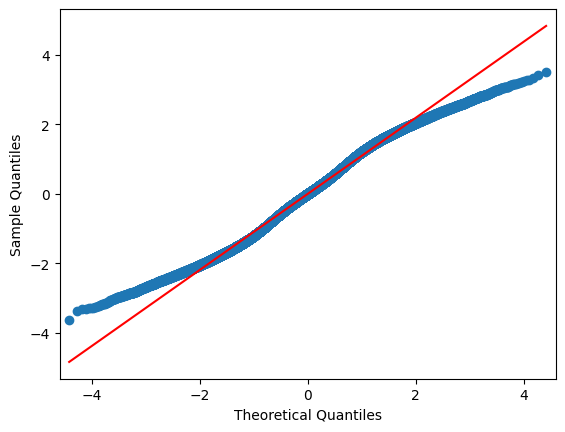

In [50]:
fig = sm.qqplot(df_model.resid, line = 's')
plt.show()

3. HOW DOES TEMPERATURE INFLUENCE CROP YIELD?
A MULTIPLE LINEAR REGRESSION MODEL IS RELEVANT HERE.

In [51]:
x_df = df[["Temperature_Celsius", "Fertilizer_Used", "Irrigation_Used"]]
y_df = df[["Yield_tons_per_hectare"]]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.3, random_state = 42)

In [53]:
#We need to set up a multiple regression formula
# ols_mr_formula = "Yield_tons_per_hectare ~ Temperature_Celsius + C(Fertilizer_Used) + C(Irrigation_Used)"

In [54]:
# ols_mr_data = pd.concat([x_train, y_train], axis = 1)

In [55]:
# model = OLS_mr.fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Yield_tons_per_hectare   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                    0.9422
Date:                    Tue, 22 Oct 2024   Prob (F-statistic):              0.452
Time:                            10:48:41   Log-Likelihood:            -3.8944e+05
No. Observations:                  200000   AIC:                         7.789e+05
Df Residuals:                      199994   BIC:                         7.790e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.6589      0.009    501.821      0.000       4.641       4.677
C(Soil_Type)[T.Clay]     -0.0206      0.013     -1.567      0.117      -0.046       0.005
C(Soil_Type)[T.Loam]     -0.0080      0.013     -0.607      0.544      -0.034       0.018
C(Soil_Type)[T.Peaty]    -0.0154      0.013     -1.170      0.242      -0.041       0.010
C(Soil_Type)[T.Sandy]    -0.0034      0.013     -0.261      0.794      -0.029       0.022
C(Soil_Type)[T.Silt]     -0.0214      0.013     -1.631      0.103      -0.047       0.004
==============================================================================
Omnibus:                     4278.432   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2254.756
Skew:                           0.006   Prob(JB):                         0.00
Kurtosis:                       2.480   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

TEMPERATURE HAS A POSITIVE BUT SMALLER EFFECT ON CROP YIELD COMPARED TO THE OTHER VARIABLES SUCH AS FERTILIZER AND IRRIGATION, THEREFORE MAXIMIZING CROP YIELD APPEARS TO RELY MORE ON FERTILIZER AND IRRIGATION USES

4. WHAT WEATHER CONDITIONS CORRELATE WITH HIGHER CROP YIELDS?

In [57]:
df['Yield_Category']= (df['Yield_tons_per_hectare'] > df['Yield_tons_per_hectare'].median()).astype(int)

In [58]:
contingency_table = pd.crosstab(df['Weather_Condition'], df['Yield_Category'])

In [59]:
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

In [60]:
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 0.7479151473422005
P-value: 0.6880061007829018
Degrees of Freedom: 2
Expected Frequencies Table:
[[33243.  33243. ]
 [33323.5 33323.5]
 [33433.5 33433.5]]


There is no significant association between weather conditions and crop yield.

5. HOW DO THE NUMBER OF DAYS TO HARVEST AFFECT CROP YIELD?

In [61]:
correlation, p_value = pearsonr(df['Days_to_Harvest'], df['Yield_tons_per_hectare'])
print(f'Correlation: {correlation}, P-value: {p_value}')

Correlation: -0.000509150284525636, P-value: 0.8198813997567641


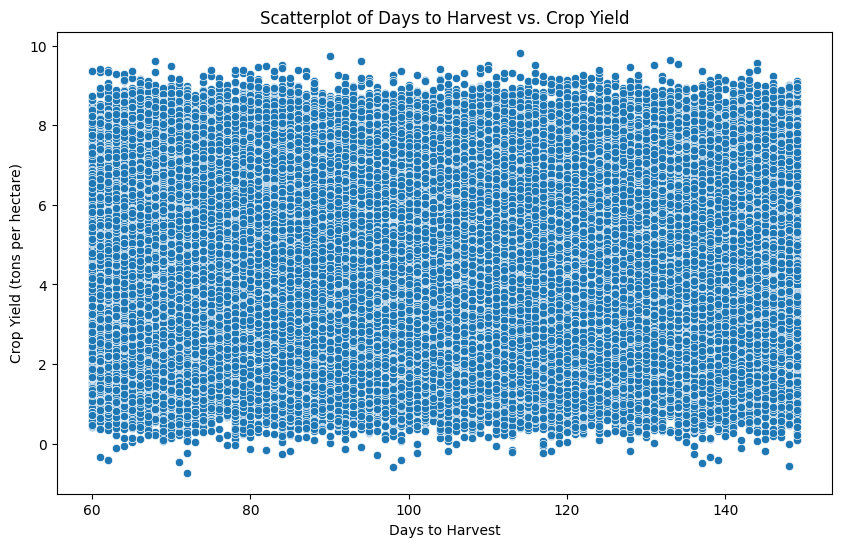

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days_to_Harvest', y='Yield_tons_per_hectare', data=df)
plt.title('Scatterplot of Days to Harvest vs. Crop Yield')
plt.xlabel('Days to Harvest')
plt.ylabel('Crop Yield (tons per hectare)')
plt.show()

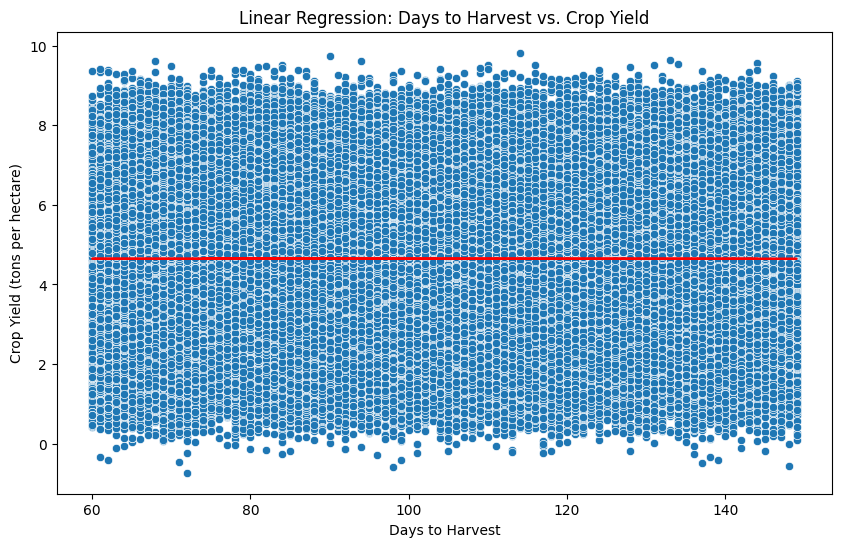

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05185
Date:                Tue, 22 Oct 2024   Prob (F-statistic):              0.820
Time:                        10:48:42   Log-Likelihood:            -3.8945e+05
No. Observations:              200000   AIC:                         7.789e+05
Df Residuals:                  199998   BIC:                         7.789e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6509      0.016    295.711      0.0

In [63]:
X = df['Days_to_Harvest'].values.reshape(-1, 1)  # Independent variable (Days to Harvest)
y = df['Yield_tons_per_hectare'].values  # Dependent variable (Crop Yield)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
# Predict values and visualize the regression line
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days_to_Harvest', y='Yield_tons_per_hectare', data=df)
plt.plot(df['Days_to_Harvest'], y_pred, color='red')  # Regression line
plt.title('Linear Regression: Days to Harvest vs. Crop Yield')
plt.xlabel('Days to Harvest')
plt.ylabel('Crop Yield (tons per hectare)')
plt.show()
# Linear Regression Summary using statsmodels (more detailed)
X_with_const = sm.add_constant(X)  # Add a constant for intercept
model_sm = sm.OLS(y, X_with_const)
result = model_sm.fit()
print(result.summary())

6. HOW DOES IRRIGATION AFFECT THE CROP YIELD IN DIFFERENT WEATHER CONDITIONS?

In [64]:
x_df = df[["Irrigation_Used", "Weather_Condition"]]
y_df = df[["Yield_tons_per_hectare"]]

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.3, random_state = 42)

In [66]:
ols_mr_formula = "Yield_tons_per_hectare ~ C(Irrigation_Used)  + C(Weather_Condition)"

In [67]:
ols_mr_data = pd.concat([x_train, y_train], axis = 1)

In [68]:
OLS_mr = ols(formula = ols_mr_formula, data = ols_mr_data)

In [69]:
model = OLS_mr.fit()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Yield_tons_per_hectare   R-squared:                       0.125
Model:                                OLS   Adj. R-squared:                  0.125
Method:                     Least Squares   F-statistic:                     6640.
Date:                    Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                            10:48:43   Log-Likelihood:            -2.6341e+05
No. Observations:                  140000   AIC:                         5.268e+05
Df Residuals:                      139996   BIC:                         5.269e+05
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         4.0439      0.008    476.340      0.000       4.027       4.061
C(Irrigation_Used)[T.True]        1.1982      0.008    141.140      0.000       1.182       1.215
C(Weather_Condition)[T.Rainy]     0.0017      0.010      0.165      0.869      -0.019       0.022
C(Weather_Condition)[T.Sunny]     0.0038      0.010      0.369      0.712      -0.017       0.024
==============================================================================
Omnibus:                     5506.675   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2382.458
Skew:                           0.007   Prob(JB):                         0.00
Kurtosis:                       2.361   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

////////////////////////////////////////////////////////////
// LINEAR REGRESSION
//////////////////////////////////////////////////////////////

In [71]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Importing additional metrics
from sklearn.metrics import mean_absolute_error
import numpy as np

# Function to calculate Adjusted R² score
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Load dataset
data = pd.read_csv('dataset/crop_yield.csv')

# Data Preprocessing

# Step 1: Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()

# Step 2: Remove any leading/trailing spaces from data entries
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Step 3: Drop rows with missing values (if any)
data.dropna(inplace=True)

# Step 4: Converting categorical features to numerical using Label Encoding
label_encoders = {}
for column in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Step 5: Defining features (X) and target (y)
X = data.drop(['Yield_tons_per_hectare'], axis=1)
y = data['Yield_tons_per_hectare']

# Step 6: Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    # 'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    # 'Gradient Boosting': GradientBoostingRegressor(n_estimators=10, random_state=42)
}

# Function to calculate Adjusted R² score
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Function to evaluate models with extended metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for the test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    adj_r2_test = adjusted_r2(r2_test, len(y_test), X_test.shape[1])
    
    # Calculate metrics for the train set
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    adj_r2_train = adjusted_r2(r2_train, len(y_train), X_train.shape[1])
    
    # Return a dictionary with the metrics for both sets
    return {
        'MSE_train': mse_train, 'RMSE_train': rmse_train, 'MAE_train': mae_train, 'R2_train': r2_train, 'Adj_R2_train': adj_r2_train,
        'MSE_test': mse_test, 'RMSE_test': rmse_test, 'MAE_test': mae_test, 'R2_test': r2_test, 'Adj_R2_test': adj_r2_test
    }

# Step 8: Training and evaluating models
for name, model in models.items():
    results = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{name}:")
    print(f"  Train: MSE = {results['MSE_train']:.4f}, RMSE = {results['RMSE_train']:.4f}, MAE = {results['MAE_train']:.4f}, R² = {results['R2_train']:.4f}, Adjusted R² = {results['Adj_R2_train']:.4f}")
    print(f"  Test:  MSE = {results['MSE_test']:.4f}, RMSE = {results['RMSE_test']:.4f}, MAE = {results['MAE_test']:.4f}, R² = {results['R2_test']:.4f}, Adjusted R² = {results['Adj_R2_test']:.4f}")


# Optional: Save the models if needed
# import pickle
# with open('model.pkl', 'wb') as f:
#     pickle.dump(models['Random Forest'], f)


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_2508\1561656477.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Linear Regression:
  Train: MSE = 0.2504, RMSE = 0.5004, MAE = 0.3993, R² = 0.9130, Adjusted R² = 0.9130
  Test:  MSE = 0.2508, RMSE = 0.5008, MAE = 0.3996, R² = 0.9130, Adjusted R² = 0.9130
Decision Tree:
  Train: MSE = 0.0000, RMSE = 0.0000, MAE = 0.0000, R² = 1.0000, Adjusted R² = 1.0000
  Test:  MSE = 0.5324, RMSE = 0.7297, MAE = 0.5829, R² = 0.8153, Adjusted R² = 0.8153


In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Function to calculate loss (MSE) and accuracy (R²)
def calculate_metrics(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Predictions for training, validation, and test sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Calculate MSE and R² for all sets
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_val, y_val_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)

    train_accuracy = r2_score(y_train, y_train_pred)
    val_accuracy = r2_score(y_val, y_val_pred)
    test_accuracy = r2_score(y_test, y_test_pred)
    
    return train_loss, val_loss, test_loss, train_accuracy, val_accuracy, test_accuracy

# Function to train Gradient Boosting model with tracking of metrics per iteration
def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test, n_estimators):
    train_losses = []
    val_losses = []
    test_losses = []
    train_accuracies = []
    val_accuracies = []
    test_accuracies = []

    # Iteratively train the model with increasing number of estimators
    for i in range(1, n_estimators + 1):
        model.n_estimators = i  # Update the number of trees (estimators)
        model.fit(X_train, y_train)
        
        # Calculate metrics for train, validation, and test sets
        train_loss, val_loss, test_loss, train_accuracy, val_accuracy, test_accuracy = calculate_metrics(
            model, X_train, y_train, X_val, y_val, X_test, y_test
        )
        
        # Append the metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        test_accuracies.append(test_accuracy)

    return train_losses, val_losses, test_losses, train_accuracies, val_accuracies, test_accuracies

# Initialize Gradient Boosting model
model = GradientBoostingRegressor(random_state=42)

# Call the training function
n_estimators = 10  # Number of boosting rounds
train_losses, val_losses, test_losses, train_accuracies, val_accuracies, test_accuracies = train_and_evaluate(
    model, X_train, y_train, X_test, y_test, X_test, y_test, n_estimators
)

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot Loss vs. Iteration
plt.subplot(1, 2, 1)
plt.plot(range(1, n_estimators + 1), train_losses, label="Training Loss (MSE)")
plt.plot(range(1, n_estimators + 1), val_losses, label="Validation Loss (MSE)")
plt.plot(range(1, n_estimators + 1), test_losses, label="Test Loss (MSE)")
plt.title("Loss vs. Iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.legend()

# Plot Accuracy vs. Iteration
plt.subplot(1, 2, 2)
plt.plot(range(1, n_estimators + 1), train_accuracies, label="Training Accuracy (R²)")
plt.plot(range(1, n_estimators + 1), val_accuracies, label="Validation Accuracy (R²)")
plt.plot(range(1, n_estimators + 1), test_accuracies, label="Test Accuracy (R²)")
plt.title("Accuracy vs. Iteration")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (R²)")
plt.legend()

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [ ]:
# %pip install xgboost lightgbm catboost

In [ ]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from tqdm import tqdm  # Progress bar

# Load dataset
data = pd.read_csv('dataset/crop_yield.csv')

# Data Preprocessing

# Step 1: Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()

# Step 2: Remove any leading/trailing spaces from data entries
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Step 3: Drop rows with missing values (if any)
data.dropna(inplace=True)

# Step 4: Converting categorical features to numerical using Label Encoding
label_encoders = {}
for column in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Step 5: Defining features (X) and target (y)
X = data.drop(['Yield_tons_per_hectare'], axis=1)
y = data['Yield_tons_per_hectare']

# Step 6: Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet Regression': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Huber Regressor': HuberRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=10, random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=10, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Bagging Regressor': BaggingRegressor(n_estimators=50, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=10, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=10, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=10, learning_rate=0.1, depth=6, silent=True),
    'Neural Network (MLP Regressor)': MLPRegressor(hidden_layer_sizes=(10,10), max_iter=50, random_state=42) # 100,100   , 50->500
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Step 8: Training and evaluating models with progress bar
for name, model in tqdm(models.items(), desc="Training Models", total=len(models)):
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")

# Optional: Save the models if needed
# import pickle
# with open('model.pkl', 'wb') as f:
#     pickle.dump(models['Random Forest'], f)


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_1768\693393268.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
Training Models:  12%|█▏        | 2/17 [00:00<00:02,  6.31it/s]

Linear Regression: MSE = 0.2508, R² = 0.9130
Ridge Regression: MSE = 0.2508, R² = 0.9130


Training Models:  18%|█▊        | 3/17 [00:00<00:02,  4.84it/s]

Lasso Regression: MSE = 0.3324, R² = 0.8847


Training Models:  24%|██▎       | 4/17 [00:00<00:02,  4.61it/s]

ElasticNet Regression: MSE = 0.3292, R² = 0.8858


c:\Users\Himanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
Training Models:  29%|██▉       | 5/17 [00:11<00:48,  4.03s/it]

Huber Regressor: MSE = 0.2510, R² = 0.9129


Training Models:  35%|███▌      | 6/17 [00:29<01:37,  8.86s/it]

Decision Tree: MSE = 0.5324, R² = 0.8153


Training Models:  41%|████      | 7/17 [02:48<08:33, 51.37s/it]

Random Forest: MSE = 0.2908, R² = 0.8991


Training Models:  47%|████▋     | 8/17 [03:40<07:43, 51.46s/it]

Extra Trees: MSE = 0.2974, R² = 0.8968


Training Models:  53%|█████▎    | 9/17 [04:37<07:06, 53.33s/it]

Gradient Boosting: MSE = 0.7710, R² = 0.7326


Training Models:  59%|█████▉    | 10/17 [05:42<06:37, 56.74s/it]

AdaBoost Regressor: MSE = 0.4375, R² = 0.8483


In [ ]:
import warnings
